<center> 
<img src="LogoPET2021_2.png" width="25%" height="25%">
</center>   

# <center> Análise Exploratória de Dados com Python</center>

A base de dados a ser trabalhada contêm nome, cargo e remuneração dos funcionários da cidade de São Francisco em uma base anual de 2011 a 2014. A base de dados está disponível na plataforma Kaggle: 
https://www.kaggle.com/kaggle/sf-salaries

## Primeiros passos

In [1]:
# Importação de pacotes necessários para a análise

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leitura da base de dados
dataset = pd.read_csv("Salaries.csv", sep = ',')

#### Comentários:  

- O argumento da função pd.read_csv deve conter o nome do arquivo da base de dados.
- Caso esteja em um diretório diferente, o caminho até ele deve ser especificado.
- Pacote Warnings utilizado para suprimir avisos de erros irrelevantes com o objetivo de melhorar a visualização do arquivo, fique atento ao pacote caso for explorar esse arquivo, pode ser necessário remover o mesmo para uma melhor utilização.

In [3]:
# Apresentação da base de dados
dataset

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [4]:
# Informações da base de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


#### Quadro com as variáveis da bae de dados: 
Variável | Significado
:---- | :----  
Id | Identificação
EmployeeName | Nome do funcionário
JobTitle | Cargo
BasePay | Salário Base
OvertimePay | Pagamento de Hora Extra
OtherPay | Outros Pagamentos
Benefits | Benefícios
TotalPay | Salário Total
TotalPayBenefits | Pagamento Total
Year | Ano
Notes | Notas
Agency | Local de Atuação 
Status | Status

#### Comentários    
-  Note que as colunas **BasePay**, **OvertimePay**, **OtherPay**, **Benefits** estão como objetos, devemos então transformá-las em variaveis numéricas.  

-  Transformaremos as colunas **Id**, **EmployeeName** e **JobTitle** para o tipo adequado para a análise.  

-  Todos os registros da variável **Notes** são nulos - e identificados por *NaN (Not a Number)* -  por isso excluiremos a coluna. Todas os valores da variável **Agency** são *Sao Francisco*, portanto, também excluiremos a variável **Agency**. Os registros da variável **Status** não serão úteis para a análise, visto que mais de 74% dos registros são *NaN*. A variável será excluída.  

## Limpeza da Base de Dados

#### Comentário: 

- Utilizando a função pd.unique(), obeteremos os valores distintos para cada variável especificada.

In [5]:
# Impressão dos valores únicos das variáveis
print(pd.unique(dataset["BasePay"]))
print(pd.unique(dataset["OvertimePay"]))
print(pd.unique(dataset["OtherPay"]))
print(pd.unique(dataset["Benefits"]))

[167411.18 155966.02 212739.13 ... '6.04' '15.50' 'Not Provided']
[0.0 245131.88 106088.18 ... '102.70' '56.77' 'Not Provided']
[400184.25 137811.38 16452.6 ... '13.35' 'Not Provided' '-618.13']
[nan 44430.12 69810.19 ... '0.13' '1.24' 'Not Provided']


#### Comentário: 

- Para as variáveis **Basepay**, **OverTimePay**, **Otherpay** e **Benefits**, utilizamos a o método _.to_numeric()_ e para as variáveis **Id**, **EmployeeName** e **JobTitle**, utilizamos o método _.astype()_ a fim de alterarmos os tipos das variáveis.

In [6]:
# Transformação das variáveis de tipo objeto para tipo numérica
# errors = 'coerce': transforma valores não numéricos em NaN
dataset['BasePay'] = pd.to_numeric(dataset['BasePay'], errors = 'coerce')
dataset['OvertimePay'] = pd.to_numeric(dataset['OvertimePay'], errors = 'coerce')
dataset['OtherPay'] = pd.to_numeric(dataset['OtherPay'], errors = 'coerce')
dataset['Benefits'] = pd.to_numeric(dataset['Benefits'], errors = 'coerce')

In [7]:
# Transformação das variáveis de tipo objeto para tipo string
dataset['Id'] = dataset['Id'].astype('string')
dataset['EmployeeName'] = dataset['EmployeeName'].astype('string')
dataset['JobTitle'] = dataset['JobTitle'].astype('string')

In [8]:
# Variáveis Notes, Agency e Status
print(dataset[['Notes','Agency','Status']])

        Notes         Agency Status
0         NaN  San Francisco    NaN
1         NaN  San Francisco    NaN
2         NaN  San Francisco    NaN
3         NaN  San Francisco    NaN
4         NaN  San Francisco    NaN
...       ...            ...    ...
148649    NaN  San Francisco     PT
148650    NaN  San Francisco    NaN
148651    NaN  San Francisco    NaN
148652    NaN  San Francisco    NaN
148653    NaN  San Francisco     PT

[148654 rows x 3 columns]


#### Comentários:  

- Abaixo, podemos verificar a quantidade de registros *NaN (Not a Number)* para as variáveis **Notes** e **Status**. Podendo, assim, observar uma significativa quantidade de registros indisponíveis. Também podemos observar a frequência de registros da variável **Agency**, observando que esta apresenta o mesmo registro (*San Francisco*) ao longo de toda a base de dados. Dessa forma, iremos excluir essas variáveis a fim de retirar do *dataset*, informações que não nos serão úteis.  
- utilizaremos o método _.drop()_  do _pandas_ para excluir essas variáveis.

In [9]:
# Verificação das variáveis Notes, Agency e Status
print("Registros 'NaN' (Not a Number) ou 'na' (not available)")
print('  Notes:', pd.Series(dataset['Notes']).isna().sum())
print('  Agency:', pd.Series(dataset['Agency']).isna().sum())
print('  Status:', pd.Series(dataset['Status']).isna().sum())
print('  Status (%):', pd.Series(dataset['Status']).isna().sum()/len(dataset['Status'])*100)
print("\nDistribuição de frequência da variável Agency")
print(dataset['Agency'].value_counts())

Registros 'NaN' (Not a Number) ou 'na' (not available)
  Notes: 148654
  Agency: 0
  Status: 110535
  Status (%): 74.35723223054879

Distribuição de frequência da variável Agency
San Francisco    148654
Name: Agency, dtype: int64


In [10]:
# Exclusão das variáveis
dataset = dataset.drop(columns=['Notes', 'Status', 'Agency'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  string 
 1   EmployeeName      148654 non-null  string 
 2   JobTitle          148654 non-null  string 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
dtypes: float64(6), int64(1), string(3)
memory usage: 11.3 MB


## Padronizando os dados da variável JobTitle

#### Variável JobTitle

In [11]:
# Frequência para a variável JobTitle
dataset['JobTitle'].value_counts().head(20)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Deputy Sheriff                  1933
Police Officer                  1476
SPECIAL NURSE                   1402
Public Service Trainee          1328
REGISTERED NURSE                1219
Police Officer 2                1141
Attorney (Civil/Criminal)       1126
Porter                          1095
Sergeant 3                      1047
General Laborer                 1033
Name: JobTitle, dtype: Int64

#### Comentário

-  Nos resultados, podemos ver que *Transit Operator* é o emprego com maior quantidade de funcionários. Também observamos, na 7ª linha, *TRANSIT OPERATOR*. Os registros diferentes do mesmo cargo devem ser unificados/padronizados. Fato semelhante ocorre com outros cargos. Abaixo, apresentamos alguns cargos registrados de diferentes formas e um  tratamento para a unificação dos registros.

In [12]:
# Verificação dos registros 'transit operator' da variável JobTitle
dataset.loc[dataset['JobTitle'].str.lower().str.contains('transit operator'), 'JobTitle'].value_counts()

Transit Operator    7036
TRANSIT OPERATOR    2388
Name: JobTitle, dtype: Int64

In [13]:
# Verificação de registros 'nurse' da variável JobTitle
dataset.loc[dataset['JobTitle'].str.lower().str.contains('nurse'), 'JobTitle'].value_counts()

Special Nurse                4389
Registered Nurse             3736
SPECIAL NURSE                1402
REGISTERED NURSE             1219
Licensed Vocational Nurse     707
Nurse Practitioner            674
Nurse Manager                 262
NURSE PRACTITIONER            207
LICENSED VOCATIONAL NURSE     194
Public Health Nurse           177
NURSE MANAGER                  80
Clinical Nurse Specialist      68
PUBLIC HEALTH NURSE            58
Nurses Staffing Assistant      57
Nurse Midwife                  54
CLINICAL NURSE SPECIALIST      27
NURSES STAFFING ASSISTANT      21
NURSE MIDWIFE                  18
Nursery Specialist             14
NURSERY SPECIALIST              5
Chief Nursery Specialist        3
OPERATING ROOM NURSE            2
Operating Room Nurse            2
CHIEF NURSERY SPECIALIST        1
Name: JobTitle, dtype: Int64

In [14]:
# Verificação de registros 'police officer' da variável JobTitle
dataset.loc[dataset['JobTitle'].str.lower().str.contains('police officer'), 'JobTitle'].value_counts()

Police Officer 3                2421
Police Officer                  1476
Police Officer 2                1141
POLICE OFFICER III               779
POLICE OFFICER I                 467
POLICE OFFICER II                361
Institutional Police Officer      37
INSTITUTIONAL POLICE OFFICER      13
Name: JobTitle, dtype: Int64

#### Comentário  

-  A padronização dos registros pode demandar bastante tempo para implementação. Abaixo, apresentamos uma função que realiza esse procedimento. Além da padronização, será feito a tradução dos cargos elegidos para nosso estudo e o descarte de todos os funcionários dos demais cargos.  
- Após a estruturação e criação da função que padronizará os cargos, criaremos a variável **JobTitle_New**  aplicando a função criada acima na variável **JobTitle** através do método .map(), que retorna um iterador que aplica a função a cada item de iterável, gerando os resultados.

In [15]:
# Função para a padronização de registros da variável JobTitle
def CargosSelecionados(job):
    if bool(re.search('nurse\s|\snurse\s|\snurse$|nurses\s', job.lower())):
        return 'Enfermeira'
    elif job.lower().__contains__('transit operator'):
        return 'Operador de trânsito'
    elif job.lower().__contains__('clerk'):
        return 'Escriturário'
    elif job.lower().__contains__('police'):
        return 'Policial'
    elif job.lower().__contains__('firefighter'):
        return 'Bombeiro'
    elif job.lower().__contains__('engineer'):
        return 'Engenheiro'
    elif job.lower().__contains__('custodian'):
        return 'Gestor de ativos'
    elif bool(re.search('sheriff\s|\ssheriff$|.sheriff|^sheriff$', job.lower())):
        return 'Delegado'
    elif job.lower().__contains__('recreation leader'):
        return 'Lider de recreação'
    elif job.lower().__contains__('public svc aide-public works'):
        return 'Assistente de obras'
    elif job.lower().__contains__('guard'):
        return 'Guarda'
    elif job.lower().__contains__('administrative analyst'):
        return 'Analista administrativo'
    elif job.lower().__contains__('patient care assistant'):
        return 'Assistente de pacientes'
    elif job.lower().__contains__('sergeant'):
        return 'Oficial'
    elif job.lower().__contains__('attorney'):
        return 'Advogado'
    elif job.lower().__contains__('general laborer'):
        return 'Operário geral'
    elif bool(re.search('^porter$|^porter\s', job.lower())):
        return 'Porteiro'
    elif job.lower().__contains__('gardener'):
        return 'Jardineiro'
    elif job.lower().__contains__('library'):
        return 'Assistente de biblioteca'
    elif job.lower().__contains__('food service'):
        return 'Nutricionista'
    elif job.lower().__contains__('public service'):
        return 'Servidor público'
    elif job.lower().__contains__('librarian'):
        return 'Bibliotecário'
    elif job.lower().__contains__('truck driver'):
        return 'Motorista de caminhão'
    elif job.lower().__contains__('safety'):
        return 'Segurança particular'
    elif job.lower().__contains__('social worker'):
        return 'Assistente social'
    elif job.lower().__contains__('medical'):
        return 'Médico'
    elif job.lower().__contains__('accountant'):
        return 'Contador'  
    elif job.lower().__contains__('manager'):
        return 'Gerente'  
    else: return 'Descartar'

In [16]:
# Nova base de dados, com os registros padronizados.
dataset['JobTitle_New'] = dataset['JobTitle'].map(CargosSelecionados)

# map() - função integrada do Python para aplicar uma função a cada item em um iterável 
# (como uma lista ou um dicionário) e retornar um novo iterador para recuperar os resultados.

In [17]:
# Verificação da base de dados
dataset.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,Gerente
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,Policial
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,Policial
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,Descartar
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,Descartar


In [18]:
# Verificação dos dados da nova variável JobTitle_New
dataset['JobTitle_New'].value_counts()

Descartar                   57968
Enfermeira                  13354
Operador de trânsito         9424
Escriturário                 9353
Policial                     8201
Engenheiro                   4751
Bombeiro                     4071
Gerente                      3765
Gestor de ativos             3214
Delegado                     3085
Servidor público             2707
Lider de recreação           2663
Assistente de obras          2518
Guarda                       2193
Analista administrativo      2177
Assistente de biblioteca     1950
Assistente de pacientes      1945
Advogado                     1841
Assistente social            1748
Operário geral               1593
Porteiro                     1524
Oficial                      1386
Jardineiro                   1274
Nutricionista                1075
Médico                       1069
Segurança particular         1061
Bibliotecário                1025
Contador                     1010
Motorista de caminhão         709
Name: JobTitle

In [19]:
# Verificação de informações da base de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  string 
 1   EmployeeName      148654 non-null  string 
 2   JobTitle          148654 non-null  string 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  JobTitle_New      148654 non-null  object 
dtypes: float64(6), int64(1), object(1), string(3)
memory usage: 12.5+ MB


In [20]:
# Atribuição do tipo string para a variável JobTitle_New
dataset['JobTitle_New'] = dataset['JobTitle_New'].astype('string')

In [21]:
# Verificando a alteração para o tipo da variável JobTitle_New
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  string 
 1   EmployeeName      148654 non-null  string 
 2   JobTitle          148654 non-null  string 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  JobTitle_New      148654 non-null  string 
dtypes: float64(6), int64(1), string(4)
memory usage: 12.5 MB


In [22]:
# Verificação da base de dados
dataset.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,Gerente
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,Policial
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,Policial
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,Descartar
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,Descartar


In [23]:
# Conjunto de dados sem os empregados com JobTitle_New = Descartar
dataset = dataset.loc[dataset['JobTitle_New'] != 'Descartar']
dataset.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,Gerente
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,Policial
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,Policial
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,NaN,297608.92,297608.92,2011,Policial
15,16,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778.01,73478.20,13957.65,NaN,286213.86,286213.86,2011,Policial


#### Comentário:
- A seguir, iremos excluir a variável **JobTitle** para ficarmos apenas com a variável com os cargos padronizados.

In [24]:
# Exclusão das variável JobTitle
dataset = dataset.drop(columns=['JobTitle'])
dataset.head()

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
0,1,NATHANIEL FORD,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,Gerente
1,2,GARY JIMENEZ,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,Policial
2,3,ALBERT PARDINI,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,Policial
11,12,PATRICIA JACKSON,99722.00,87082.62,110804.30,NaN,297608.92,297608.92,2011,Policial
15,16,RICHARD CORRIEA,198778.01,73478.20,13957.65,NaN,286213.86,286213.86,2011,Policial


In [25]:
# Cálculo de estatísticas descritivas
dataset.describe(include='all')

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
count,90686,90686,90394.000000,90686.000000,90686.000000,68055.000000,90686.000000,90686.000000,90686.000000,90686
unique,90686,67778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
top,1,Steven Lee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enfermeira
freq,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13354
mean,NaN,NaN,64273.882996,5293.137784,3923.274818,24125.088727,73283.340017,91387.930729,2012.509406,NaN
std,NaN,NaN,43909.694973,11206.092534,7632.360280,15920.399369,51897.498818,64256.088200,1.121546,NaN
min,NaN,NaN,-166.010000,0.000000,-50.190000,-33.890000,0.000000,-33.890000,2011.000000,NaN
25%,NaN,NaN,25183.085000,0.000000,20.000000,7397.840000,27503.182500,34136.867500,2012.000000,NaN
50%,NaN,NaN,61942.220000,125.420000,1041.710000,27766.690000,67629.745000,88436.750000,2013.000000,NaN
75%,NaN,NaN,98258.095000,5497.135000,4833.020000,35884.330000,112155.685000,135378.345000,2014.000000,NaN


### Comentários  
- Para as variáveis qualitativas (tipo string) são fornecidos:  
    - contagem de registros  
    - registros únicos     
    - registro mais citado   
    - frequência do registro mais citado  
- Para as variáveis quantitativas (tipo float ou int) são fornecidos: 
    - média  
    - desvio padrão  
    - mínimo  
    - 1o. quartil  
    - mediana  
    - 3o. quartil
    - máximo   
- Verificamos a existência de valores negativos para as variáveis **BasePay, OtherPay, Benefits e TotalPayBenefits.**

In [26]:
# Identificação de registros negativos para a variável BasePay
dataset.loc[dataset['BasePay'] < 0]

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
72832,72833,Irwin Sidharta,-166.01,249.02,0.0,6.56,83.01,89.57,2012,Escriturário
72865,72866,Robert Scott,-121.63,182.70,0.0,5.44,61.07,66.51,2012,Escriturário
72872,72873,Chung Huey Kung,-109.22,163.83,0.0,4.32,54.61,58.93,2012,Escriturário
72874,72875,Jordan Li,-106.60,159.90,0.0,4.66,53.30,57.96,2012,Escriturário
72878,72879,Richard Jackson,-101.88,153.08,0.0,4.55,51.20,55.75,2012,Escriturário
72884,72885,DiMarco McGhee-Stewart,-93.14,139.97,0.0,4.17,46.83,51.00,2012,Escriturário
72888,72889,Leopoldo Marasigan,-87.38,131.06,0.0,3.89,43.68,47.57,2012,Escriturário
72894,72895,Douglas Avalos,-75.67,113.76,0.0,3.39,38.09,41.48,2012,Escriturário
72908,72909,Norma Rodriguez,-59.59,89.65,0.0,2.68,30.06,32.74,2012,Escriturário
72920,72921,Charles Williams,-30.58,45.87,0.0,1.36,15.29,16.65,2012,Escriturário


In [27]:
# Identificação de registros negativos para a variável OtherPay
dataset.loc[dataset['OtherPay'] < 0]

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
96168,96169,John G Alexander,59733.32,46.76,-46.76,25863.91,59733.32,85597.23,2013,Jardineiro
107184,107185,Amelie E Bullard,6932.50,0.00,-50.19,418.03,6882.31,7300.34,2013,Enfermeira


In [28]:
# Identificação de registros negativos para a variável Benefits
dataset.loc[dataset['Benefits'] < 0]

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
110528,110529,Timothy E Gibson,NaN,0.0,0.0,-2.73,0.0,-2.73,2013,Policial
110529,110530,Mark E Laherty,NaN,0.0,0.0,-8.20,0.0,-8.20,2013,Policial
110530,110531,David P Kucia,NaN,0.0,0.0,-33.89,0.0,-33.89,2013,Policial


In [29]:
# Identificação de registros negativos para a variável TotalPayBenefits
dataset.loc[dataset['TotalPayBenefits'] < 0]

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
110528,110529,Timothy E Gibson,NaN,0.0,0.0,-2.73,0.0,-2.73,2013,Policial
110529,110530,Mark E Laherty,NaN,0.0,0.0,-8.20,0.0,-8.20,2013,Policial
110530,110531,David P Kucia,NaN,0.0,0.0,-33.89,0.0,-33.89,2013,Policial


In [30]:
# Descartando da base de dados todos os funcionários (linhas) em que as variáveis 
# BasePay, OtherPay, Benefits e TotalPayBenefits têm valores inferiores a zero.
dataset = dataset.loc[dataset['BasePay'] >= 0]
dataset = dataset.loc[dataset['OtherPay'] >= 0]
dataset = dataset.loc[dataset['Benefits'] >= 0]
dataset = dataset.loc[dataset['TotalPayBenefits'] >= 0]

In [31]:
# Confirmação da operação acima
dataset.describe(include='all')

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
count,67750,67750,67750.000000,67750.000000,67750.000000,67750.000000,67750.000000,67750.000000,67750.000000,67750
unique,67750,46419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
top,36161,Steven Lee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enfermeira
freq,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10098
mean,NaN,NaN,64829.806126,5613.320083,3907.151588,24211.308471,74350.277796,98561.586267,2013.011557,NaN
std,NaN,NaN,44253.060314,11720.990365,7370.478425,15901.526838,52505.806493,66948.251183,0.818176,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,NaN
25%,NaN,NaN,25219.750000,0.000000,28.320000,7464.700000,28241.240000,37742.332500,2012.000000,NaN
50%,NaN,NaN,62355.190000,196.740000,1085.770000,27834.845000,68302.885000,95905.235000,2013.000000,NaN
75%,NaN,NaN,98753.050000,5862.625000,4878.420000,35902.537500,113854.995000,150069.017500,2014.000000,NaN


In [32]:
# Nova verificação de registros 'na' (not available; missing value) na base de dados
dataset.isna().sum()

Id                  0
EmployeeName        0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
JobTitle_New        0
dtype: int64

In [33]:
# Trocando os nomes das variáveis
#dataset NomeFuncionario, SalarioBase, PagamentoHoraExtra, Beneficios, SalarioTotal,  TotalSalarioBeneficio, Ano, Cargo
dataset.columns = ['Id', 'NomeFuncionario', 'SalarioBase', 'PagamentoHoraExtra', 'OutrosPagamentos', 
                   'Beneficios', 'SalarioTotal', 'PagamentoTotal', 'Ano', 'Cargo']
dataset.head(5)

,Id,NomeFuncionario,SalarioBase,PagamentoHoraExtra,OutrosPagamentos,Beneficios,SalarioTotal,PagamentoTotal,Ano,Cargo
36160,36161,Gregory Suhr,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Policial
36163,36164,Frederick Binkley,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Bombeiro
36174,36175,Leda Rozier,98211.01,0.00,200951.30,60285.44,299162.31,359447.75,2012,Gerente
36188,36189,Susan Currin,254878.82,0.00,9486.00,75003.33,264364.82,339368.15,2012,Médico
36199,36200,Scott Scholzen,109783.86,160418.47,19873.80,41230.89,290076.13,331307.02,2012,Bombeiro


#### Comentário  
- Abaixo, iremos redefinir o indice da base de dados que apresentava descontinuidade após termos excluindo algumas linhas nas operações anteriores.  

In [34]:
# Redefinir o índice do dataset
DS = dataset.reset_index(drop=True)
DS

,Id,NomeFuncionario,SalarioBase,PagamentoHoraExtra,OutrosPagamentos,Beneficios,SalarioTotal,PagamentoTotal,Ano,Cargo
0,36161,Gregory Suhr,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Policial
1,36164,Frederick Binkley,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Bombeiro
2,36175,Leda Rozier,98211.01,0.00,200951.30,60285.44,299162.31,359447.75,2012,Gerente
3,36189,Susan Currin,254878.82,0.00,9486.00,75003.33,264364.82,339368.15,2012,Médico
4,36200,Scott Scholzen,109783.86,160418.47,19873.80,41230.89,290076.13,331307.02,2012,Bombeiro
...,...,...,...,...,...,...,...,...,...,...
67745,148636,James S Kibblewhite,0.00,0.00,0.00,0.00,0.00,0.00,2014,Operário geral
67746,148640,Richard A Talbert,0.00,0.00,0.00,0.00,0.00,0.00,2014,Gestor de ativos
67747,148642,Raphael Marquis Goins,0.00,0.00,0.00,0.00,0.00,0.00,2014,Guarda
67748,148649,Leon Walker,0.00,0.00,0.00,0.00,0.00,0.00,2014,Gestor de ativos


## Explorando a base de dados

### Comentário
- Não faremos alterações na base de dados original, ao invés disso, criaremos cópias conforme for necessário.

In [35]:
# Criando a cópia do dataset, DS1.
DS1 = DS

### Objetivo 1:
Obter a média de todas as remunerações para cada Cargo e ordenar a base de dados pela média do Salário Total.
### Passos:
1. Agrupar os dados pela variável Cargo $\rightarrow$ _.groupby()_
2. Calcular a média de cada variável numérica para cada Cargo $\rightarrow$ _.mean()_
3. Ordenar a base de dados pela média do Salário Base em ordem crescente $\rightarrow$ _.sort_values()_
4. Apresentar as primeiras B linhas de resultados $\rightarrow$ _.head()_

In [36]:
B = 5
DS1.groupby('Cargo', as_index=False).mean().sort_values('SalarioTotal', ascending=True).round(2).head(B)

,Cargo,SalarioBase,PagamentoHoraExtra,OutrosPagamentos,Beneficios,SalarioTotal,PagamentoTotal,Ano
17,Lider de recreação,6563.96,1.22,109.88,429.71,6675.06,7104.77,2013.03
27,Servidor público,8058.93,61.84,41.94,2439.40,8162.72,10602.12,2013.07
3,Assistente de obras,8091.88,60.11,101.88,1378.78,8253.87,9632.65,2013.07
15,Guarda,16562.63,1748.30,527.26,5138.02,18838.19,23976.20,2013.05
2,Assistente de biblioteca,36100.35,21.53,757.19,16153.29,36879.07,53032.36,2012.96


### Objetivo 2:
Obter a média de todas as remunerações para cada Cargo em cada Ano e armazenar os resultados no objeto DS2.
### Passos:
1. Agrupar os dados pelas variáveis Cargo e Ano $\rightarrow$ _.groupby()_
2. Calcular a média de cada variável numérica para cada Cargo em cada Ano $\rightarrow$ _.mean()_
3. Ordenar a base de dados pela média do Pagamento Total em ordem decrescente $\rightarrow$ _.sort_values()_
4. Apresentar as primeiras 6 linhas de resultados e arredondar os valores para 2 casas decimais $\rightarrow$ _.head()_ e _.round()_

In [37]:
DS2 = DS1.groupby(['Cargo','Ano'], as_index=False).mean().sort_values('PagamentoTotal', ascending=False)
DS2.head(6).round(2)

,Cargo,Ano,SalarioBase,PagamentoHoraExtra,OutrosPagamentos,Beneficios,SalarioTotal,PagamentoTotal
64,Oficial,2013,131281.25,16545.51,18867.53,38441.07,166694.30,205135.37
65,Oficial,2014,129854.82,17721.68,13648.50,41219.05,161224.99,202444.04
63,Oficial,2012,122365.80,15051.42,15743.24,35629.49,153160.46,188789.95
22,Bombeiro,2013,107237.87,28492.86,15102.64,37413.76,150833.38,188247.14
1,Advogado,2013,143520.20,0.00,2999.53,40507.06,146519.73,187026.80
2,Advogado,2014,138537.16,0.00,3542.18,41832.27,142079.34,183911.61


In [38]:
# Verificação de informações da base de dados DS2
DS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 64 to 51
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cargo               84 non-null     object 
 1   Ano                 84 non-null     int64  
 2   SalarioBase         84 non-null     float64
 3   PagamentoHoraExtra  84 non-null     float64
 4   OutrosPagamentos    84 non-null     float64
 5   Beneficios          84 non-null     float64
 6   SalarioTotal        84 non-null     float64
 7   PagamentoTotal      84 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.9+ KB


In [39]:
# Atribuição do tipo string para a variável Cargo
DS2['Cargo'] = DS2['Cargo'].astype('string')
# Verificação da alteração
DS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 64 to 51
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cargo               84 non-null     string 
 1   Ano                 84 non-null     int64  
 2   SalarioBase         84 non-null     float64
 3   PagamentoHoraExtra  84 non-null     float64
 4   OutrosPagamentos    84 non-null     float64
 5   Beneficios          84 non-null     float64
 6   SalarioTotal        84 non-null     float64
 7   PagamentoTotal      84 non-null     float64
dtypes: float64(6), int64(1), string(1)
memory usage: 5.9 KB


### Objetivo 3:
Salvar a base de dados DS2 em um arquivo EXCEL $\rightarrow$ _.to_excel()_

In [40]:
DS2.to_excel("Salarios.xlsx")

### Objetivo 4:
Ordenar a base DS2 por Cargo e Ano $\rightarrow$ _.sort_values()_

In [41]:
DS2.sort_values(['Cargo', 'Ano'])

,Cargo,Ano,SalarioBase,PagamentoHoraExtra,OutrosPagamentos,Beneficios,SalarioTotal,PagamentoTotal
0,Advogado,2012,134791.558281,0.000000,1651.691816,44878.619540,136443.250097,181321.869637
1,Advogado,2013,143520.202974,0.000000,2999.529664,40507.062614,146519.732638,187026.795252
2,Advogado,2014,138537.161050,0.000000,3542.175585,41832.271384,142079.336635,183911.608019
3,Analista administrativo,2012,77313.631645,102.213365,451.309905,31573.245085,77867.154915,109440.400000
4,Analista administrativo,2013,83229.316178,50.947554,402.502953,28036.319058,83682.766685,111719.085743
...,...,...,...,...,...,...,...,...
79,Segurança particular,2013,84697.756364,10077.057879,5996.514053,30040.264129,100771.328295,130811.592424
80,Segurança particular,2014,80992.091326,13250.580573,5131.648387,30582.735448,99374.320287,129957.055735
81,Servidor público,2012,8667.611278,10.318354,27.839042,3019.125012,8705.768673,11724.893686
82,Servidor público,2013,8003.627588,51.936820,33.917018,2270.941579,8089.481425,10360.423004


### Objetivo 5:
- Apresentar apenas os registros para os cargos de Policial, Advogado, Enfermeira 
- Ordenar por Cargo e Ano $\rightarrow$ _.sort_values()_
- Arredondar os valores para 2 casas decimais $\rightarrow$ _.round()_

In [42]:
DS3 = DS2[(DS2['Cargo']=='Advogado') | (DS2['Cargo']=='Policial') | (DS2['Cargo']=='Enfermeira')]
DS3.sort_values(['Cargo','Ano']).round(2)

,Cargo,Ano,SalarioBase,PagamentoHoraExtra,OutrosPagamentos,Beneficios,SalarioTotal,PagamentoTotal
0,Advogado,2012,134791.56,0.00,1651.69,44878.62,136443.25,181321.87
1,Advogado,2013,143520.20,0.00,2999.53,40507.06,146519.73,187026.80
2,Advogado,2014,138537.16,0.00,3542.18,41832.27,142079.34,183911.61
30,Enfermeira,2012,65463.64,2302.82,5172.03,22655.36,72938.50,95593.85
31,Enfermeira,2013,69911.58,2440.04,5648.64,19034.17,78000.26,97034.43
32,Enfermeira,2014,67775.30,2677.14,5592.88,19456.91,76045.32,95502.23
72,Policial,2012,96229.01,12891.68,7138.54,29926.61,116259.23,146185.84
73,Policial,2013,102405.84,13319.12,8478.36,32036.01,124203.31,156239.32
74,Policial,2014,93872.06,14036.86,8082.79,32357.33,115991.72,148349.04


## Representação Gráfica  

### Objetivo 6:
Usando a base DS2, represente graficamente os resultados do Pagamento Total médio anual para os Advogados e Policiais.  
### Passos:
1. Atribuição do tipo string para a variável Ano $\rightarrow$ _.astype()_
2. Ordenação da base DS2 pelo Ano e selecionar apenas um Cargo, por exemplo, Advogado. $\rightarrow$ _.sort_values( )_ e _.loc[ ]_
3. Montar os gráficos $\rightarrow$ _.sort_values()_ ; _.loc[]_ ; _.plot()_ e _plt.show()_

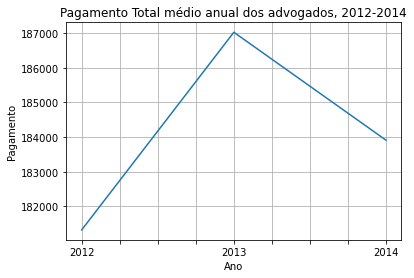

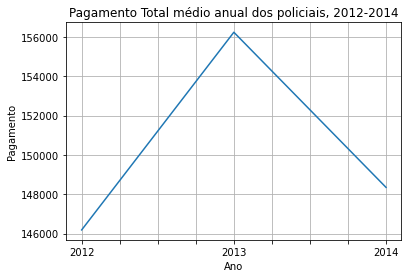

In [43]:
# 1.
DS2['Ano'] = DS2['Ano'].astype('string') 

# 2. 
DS2.sort_values(['Ano']).loc[DS2['Cargo']=='Advogado']

# 3.  

DS2.sort_values(['Ano']).loc[DS2['Cargo']=='Advogado'].plot(kind='line', x = 'Ano', y = 'PagamentoTotal', 
                          xlabel ='Ano',  ylabel = 'Pagamento', 
                          title = 'Pagamento Total médio anual dos advogados, 2012-2014', 
                          grid = True, legend = False)


DS2.sort_values(['Ano']).loc[DS2['Cargo']=='Policial'].plot(kind='line', x = 'Ano', y = 'PagamentoTotal', 
                          xlabel ='Ano',  ylabel = 'Pagamento', 
                          title = 'Pagamento Total médio anual dos policiais, 2012-2014', 
                          grid = True, legend = False)
plt.show()

### Comentários 
Abaixo são apresentados recursos para um maior controle das figuras.  
-  criar uma figura contendo um único gráfico:  
     ``` fig, ax = plt.subplots() ```  
   ou, equivalentemente,  
     ``` 
     fig = plt.figure() 
     ax = fig.add_subplot()
     ```
     
-  criar uma figura contendo múltiplos gráficos (opção 1):  
    ```fig, axs = plt.subplots(nrows=2, ncols=2)```  
   ou, equivalentemente,     
    ``` 
    fig = plt.figure()
    fig.add_subplot(221)   #gráfico esquerdo superior
    fig.add_subplot(222)   #gráfico direito superior
    fig.add_subplot(223)   #gráfico esquerdo inferior
    fig.add_subplot(224)   #gráfico direito superior
    ```
-  criar uma figura contendo múltiplos gráficos (opção 2):  
    ``` fig, (ax1, ax2, ax3) = plt.subplots(1, 3)```   
     ou, equivalentemente, 
    ``` 
    fig = plt.figure()
    ax1 = fig.add_subplot(121)   #gráfico esquerdo 
    ax2 = fig.add_subplot(122)   #gráfico central 
    ax3 = fig.add_subplot(123)   #gráfico direito 
    ```     
-  criar uma figura contendo múltiplos gráficos (opção 3):  
    ``` fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)```   
     ou, equivalentemente,      
    ``` 
    fig = plt.figure()
    ax1 = fig.add_subplot(221)   #gráfico esquerdo superior
    ax2 = fig.add_subplot(222)   #gráfico direito superior
    ax3 = fig.add_subplot(223)   #gráfico esquerdo inferior
    ax4 = fig.add_subplot(224)   #gráfico direito superior
    ```

### Objetivo 7:
Usando a base DS2, represente graficamente os resultados do Pagamento Total médio anual para Advogados, Enfermeiras e Policiais.
### Passos:
1. Criar uma figura com tamanho específico $\rightarrow$ _plt.figure()_ e _.add_subplot()_
2. Criar a base Auxiliar contendo só as variáveis Cargo, Ano, PagamentoTotal dos Advogados, Enfermeiras e Policiais. Ordenar a base por Cargo e Ano $\rightarrow$ _.loc[]_ e _.sort_values()_
3. Agrupar a base Auxiliar pelo Cargo e fazer o gráfico $\rightarrow$ _.groupby_ e _.plot()_
4. Acrescentar legenda $\rightarrow$ _plt.legend()_ e _.unique()_
5. Mostrar a figura $\rightarrow$ _plt.show()_

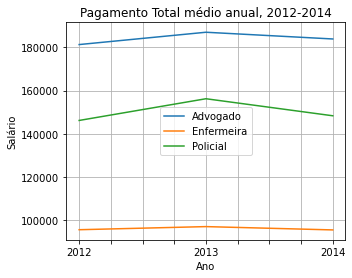

In [44]:
# 1.
fig = plt.figure(figsize=[5,4])
ax  = fig.add_subplot()

# 2. 
Auxiliar = DS2[['Cargo','Ano','PagamentoTotal']].loc[
           (DS2['Cargo']=='Policial') | (DS2['Cargo']=='Advogado') | (DS2['Cargo']=='Enfermeira')].sort_values(['Cargo','Ano'])

# 3.
Auxiliar.groupby(['Cargo']).plot(kind='line', x = 'Ano', y = 'PagamentoTotal', 
                          xlabel ='Ano',  ylabel = 'Salário', 
                          title = 'Pagamento Total médio anual, 2012-2014', 
                          grid = True, legend = True, ax = ax)

# 4.
plt.legend(Auxiliar['Cargo'].unique(), loc = 'best')

# 5.
plt.show()

### Objetivo 8:
Usando a base DS2, apresente gráficos de colunas para a variável Pagamento Total dos Advogados e Policiais.

### Passos:
1. Criar uma figura com tamanho específico para dois gráficos $\rightarrow$ _plt.figure()_ ; _.add_subplot()_ ; _.loc[]_ ; _.plot()_ e _plt.show()_

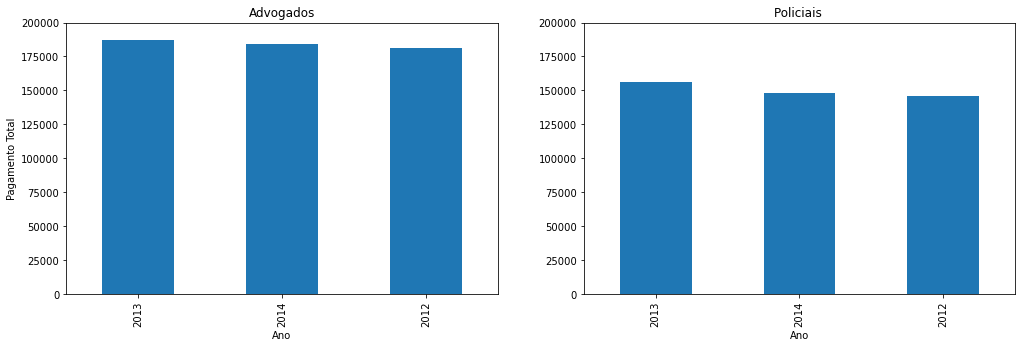

In [45]:
# 1.
fig = plt.figure(figsize=[17,5])
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 

CargoA = DS2.loc[DS2['Cargo']=='Advogado']
CargoP = DS2.loc[DS2['Cargo']=='Policial']

CargoA.plot(kind='bar', x = 'Ano', y = 'PagamentoTotal', 
                          xlabel ='Ano',  ylabel = 'Pagamento Total', 
                          title = 'Advogados', 
                          ylim = (0,200000),
                          legend = False, ax = ax1)

CargoP.plot(kind='bar', x = 'Ano', y = 'PagamentoTotal', 
                          xlabel ='Ano',  ylabel = ' ', 
                          title = 'Policiais ', 
                          ylim = (0,200000),
                          legend = False, ax = ax2)
plt.show()

### Objetivo 9:
Usando a base DS1, apresente os histogramas para a variável Pagamento Total dos Advogados e Policiais.

### Passos:
1. Definir formato da figura $\rightarrow$ _plt.subplots()_
2. Fazer o histograma para cada Cargo $\rightarrow$ _.hist()_ ; _.loc[]_ e _plt.show()_

Páginas com ajuda para as funções utilizadas.  

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist

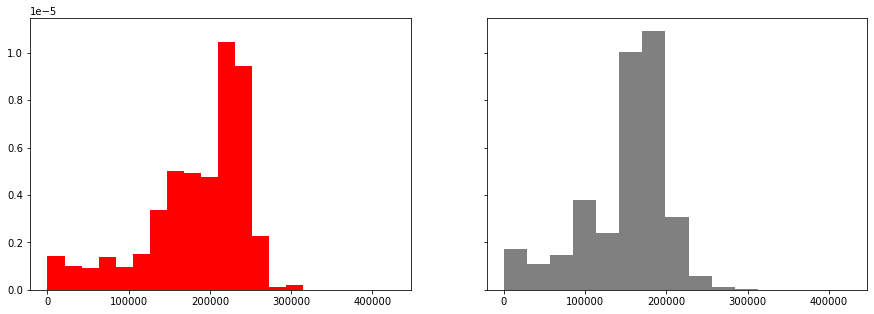

In [46]:
# 1. 
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

# 2.
axs[0].hist(DS1['PagamentoTotal'].loc[DS1['Cargo']=='Advogado'], bins = 15, density = True, color = 'red')
axs[1].hist(DS1['PagamentoTotal'].loc[DS1['Cargo']=='Policial'], bins = 15, density = True, color = 'gray')
plt.show()

----

## <center> Perguntas Propostas </center>
Abaixo, apresentamos perguntas e respostas, no sentido de explorar um pouco mais a linguagem Python.

### Pergunta 1

- Segundo os dados, é mais vantajoso seguir uma carreira de policial ou bombeiro?

#### Solução:  

- Para respondermos essa pergunta, inicialmente selecionamos apenas os registros com os cargos que nos interessam (Policial e Bombeiro) e, em seguida, calculamos a média para cada um dos cargos em cada ano.

In [47]:
# selecionando os cargos 'Bombeiro' e 'Policial' e as variáveis 'PagamentoTotal' e 'Cargo'

DS4 = DS1.loc[(DS1['Cargo'] == 'Bombeiro') | (DS1['Cargo'] == 'Policial'),['PagamentoTotal','Cargo','Ano']]
DS4

,PagamentoTotal,Cargo,Ano
0,391362.30,Policial,2012
1,381643.11,Bombeiro,2012
4,331307.02,Bombeiro,2012
5,321780.77,Bombeiro,2012
7,308774.60,Bombeiro,2012
...,...,...,...
67554,374.42,Policial,2014
67609,242.66,Policial,2014
67622,212.39,Policial,2014
67660,134.78,Policial,2014


In [48]:
# Calculando a média do pagamento total par cada cargo e verificar o que possui a maior média salarial.

DS4.groupby(['Cargo','Ano']).mean().round(2).sort_values('PagamentoTotal', ascending=False)

PagamentoTotal
Cargo    Ano                 
Bombeiro 2013       188247.14
         2012       176812.67
         2014       174109.68
Policial 2013       156239.32
         2014       148349.04
         2012       146185.84

---

### Pergunta 2

- Como se comportou a base salarial dos policiais ao longo dos anos? Represente graficamente os resultados.

#### Solução:  

- Primeiramente, separamos somente os registros 'Policial' na variável **Cargo** e selecionamos as variáveis **SalarioBase** e **Ano**. Em seguida, calculamos a média da base salarial dos policiais por ano. Por fim, utilizamos um gráfico de linha para apresentar as médias dos três anos.

In [49]:
# Selecionando o cargo 'Policial' e a variável 'Ano'

DS5 = DS1.loc[DS1['Cargo'] == 'Policial', ['SalarioBase','Ano']]
DS5

,SalarioBase,Ano
0,302578.00,2012
34,109118.22,2012
36,95449.67,2012
44,102265.48,2012
87,99304.33,2012
...,...,...
67554,309.90,2014
67609,0.00,2014
67622,0.00,2014
67660,0.00,2014


In [50]:
# Calculando a média da base salarial dos policiais por ano

DS5 = DS5.groupby(['Ano']).mean().round(2)
DS5

,SalarioBase
Ano,
2012,96229.01
2013,102405.84
2014,93872.06


In [51]:
DS5['index'] = DS5.index
DS5

,SalarioBase,index
Ano,,
2012,96229.01,2012
2013,102405.84,2013
2014,93872.06,2014


In [52]:
# Transformando o índice com os anos em uma coluna

DS5['index'] = DS5.index
DS5.columns = ['SalarioBase', 'Ano']
DS5

,SalarioBase,Ano
Ano,,
2012,96229.01,2012
2013,102405.84,2013
2014,93872.06,2014


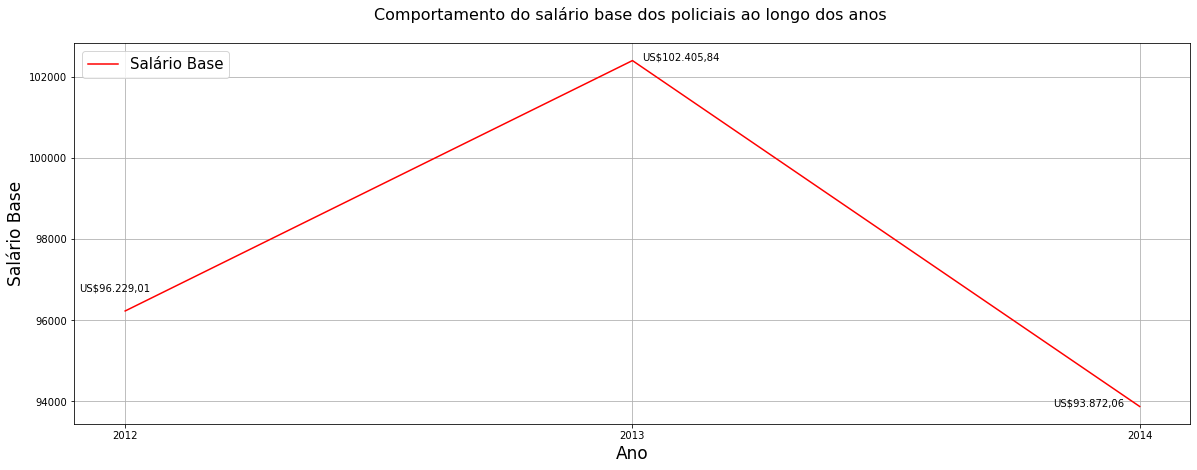

In [53]:
# Fazendo o gráfico para a média da base salarial dos policiais ao longo dos três anos

plt.figure(figsize=(20,7))

plt.plot(DS5['Ano'], DS5['SalarioBase'], color = 'red', label = 'Salário Base')
plt.grid(True)
plt.title('Comportamento do salário base dos policiais ao longo dos anos \n', fontsize = 16)
plt.legend(loc = 2, fontsize = 15)
plt.xticks([2012,2013,2014])
plt.xlabel('Ano', fontsize = 17)
plt.ylabel('Salário Base', fontsize = 17)
plt.text(2011.91, 96729.01, r'US$96.229,01')
plt.text(2013.02, 102405.84, r'US$102.405,84')
plt.text(2013.83, 93872.06, r'US$93.872,06')

plt.show()

---

### Pergunta 3

- Qual a média de pagamento total de todos os empregados a cada ano?

#### Solução:  

- inicialmente, selecionamos apenas as variáveis que nos iteressam para reponder a pergunta, **PagamentoTotal** e **Ano**. Em seguida, calculamos a média do pagamento total dos funcionários por ano.

In [54]:
DS7 = DS1.loc[:,['PagamentoTotal','Ano']]
DS7

,PagamentoTotal,Ano
0,391362.30,2012
1,381643.11,2012
2,359447.75,2012
3,339368.15,2012
4,331307.02,2012
...,...,...
67745,0.00,2014
67746,0.00,2014
67747,0.00,2014
67748,0.00,2014


In [55]:
DS7.groupby(['Ano']).mean().round(2)

,PagamentoTotal
Ano,
2012,97793.90
2013,100525.08
2014,97397.85


---

### Pergunta 4
- Qual o top 5 de empregos mais comuns?

#### Solução:  

- Utilizaremos o método _value_counts()_ para contabilizar o número de registros de cada caso (o resultado já é mostrado em ordem decrescente da frequência dos registros), e em seguida, selecionamos as cinco primeiras linhas. Adicionalmente, criamos um gráfico para ilustrar a frequência dos cinco cargos com mais funcionários.

In [56]:
DS1.value_counts('Cargo').head(5)

Cargo
Enfermeira              10098
Operador de trânsito     6975
Escriturário             6903
Policial                 5665
Bombeiro                 3262
dtype: int64

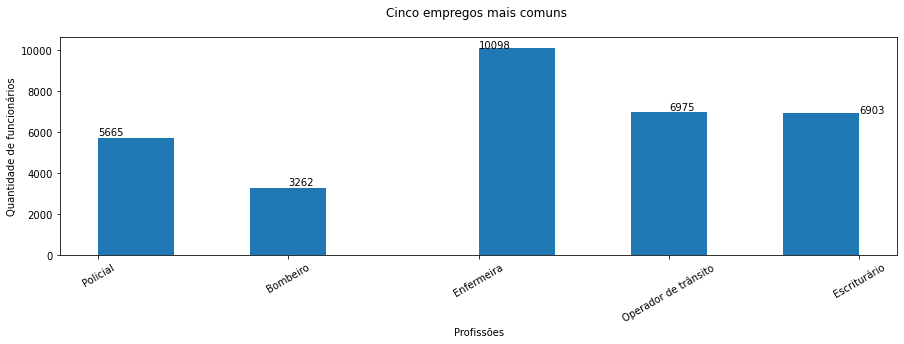

In [57]:
top_5 = DS1.loc[(DS1['Cargo'] == 'Enfermeira') | (DS1['Cargo'] == 'Operador de trânsito') | (DS1['Cargo'] == 'Escriturário') |
               (DS1['Cargo'] == 'Policial') | (DS1['Cargo'] == 'Bombeiro')]


plt.figure(figsize=(15,4))

plt.hist(top_5['Cargo'])
plt.xticks(rotation = 30)
plt.xlabel('Profissões')
plt.ylabel('Quantidade de funcionários')
plt.title('Cinco empregos mais comuns \n')
plt.text('Policial', 5845, 5665)
plt.text('Bombeiro', 3382, 3262)
plt.text('Enfermeira', 10098, 10098)
plt.text('Operador de trânsito',7075,6975)
plt.text('Escriturário',6903,6903)

plt.show()

### Pergunta 5

- Quais os 10 cargos que mais receberam benefícios durante o período 2012-2014?

#### Solução:  

- Selecionamos as colunas **Cargo** e **Benefcios**,  calculamos a soma dos benefícios por cada um dos cargos, ordenamos os resultados pela variável **Benefícios**, arredondamos a soma para uma casa decimal e selecionamos/apresentamos as dez primeiras linhas.

In [58]:
DS8 = DS1.loc[:, ['Cargo','Beneficios']]
DS8.groupby(['Cargo']).sum().sort_values('Beneficios', ascending = False).round(1).head(10)

,Beneficios
Cargo,
Enfermeira,205891250.8
Operador de trânsito,192083605.8
Policial,178046890.3
Escriturário,145926574.7
Gerente,122836318.2
Bombeiro,119640057.6
Engenheiro,107060083.8
Delegado,75808538.4
Advogado,52954036.7


---

## Pergunta 6

- Quais os 20 cargos mais bem pagos em 2012?

#### Solução:  

- Selecionamos os registros com o ano de 2012 (linhas da base de dados) e as variáveis **Cargo** e **PagamentoTotal** (colunas da base de dados). Em seguida, ordenamos a base de dados pela variável **Pagamento Total**, selecionamos/apresentamos os 20 maiores valores e observaremos os cargos que correspondem a esses registros.

In [65]:
DS9 = DS1.loc[(DS1['Ano'] == 2012) , ['Cargo','PagamentoTotal']]
DS10 = DS9.sort_values('PagamentoTotal', ascending = False).head(20)
display(DS9.sort_values('PagamentoTotal', ascending = False).head(20))
pd.unique(DS10['Cargo'])

,Cargo,PagamentoTotal
0,Policial,391362.30
1,Bombeiro,381643.11
2,Gerente,359447.75
3,Médico,339368.15
4,Bombeiro,331307.02
5,Bombeiro,321780.77
6,Gerente,312675.26
7,Bombeiro,308774.60
8,Bombeiro,302052.20
9,Advogado,301121.44


<StringArray>
['Policial', 'Bombeiro', 'Gerente', 'Médico', 'Advogado']
Length: 5, dtype: string

___
#### Conheça o PET Estatística UFC
#### Estude conosco 
#### Acompanhe @pet_estatisticaufc  
___

